# Crawler 591 web

敝人爬蟲目標為591店面出租資料，因認為具有店面之房東，其有較高之機率經濟能力更好。

In [1]:
###################################################
#=====================591 crawler==================
###################################################
from PIL import Image
import requests 
from bs4 import BeautifulSoup
import json 
from io import BytesIO
import pytesseract
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, metrics
from pandas.tools.plotting import table
from collections import Counter
from pylab import *


In [ ]:
a={}
temp = {}
http = []
detail = []
phone = []
url_phone = []
df = pd.DataFrame()
data = {}
make_to_dict = []
result = pd.DataFrame()

headers = { 
    'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36','Accept-Language':'zh-TW'
}
#==================API of each page================
url = ['https://business.591.com.tw/home/search/rsList?is_new_list=1&storeType=1&type=1&kind=5&searchtype=1&region=1&firstRow={}&totalRows=2833'.format(str(i)) for i in range(0,2826,30)]
for m in range(0,95):
    res = requests.get(url[m], headers = headers)
    #print("url[m]=",m)
    data[m] = json.loads(res.text)
#====================phone number==================
def get_text(image):
    return pytesseract.image_to_string(image) #get number which is in the image
#===================house information==============
for i in range(0,95):
    for j in range(0,30):
        temp = 'https://rent.591.com.tw/rent-detail-' + str(data[i]['data']['data'][j]['id']) + '.html' #each link
        #print("i=",i,"j=",j)
        #print(temp)
        #http[i].append(temp)        
        #print('https://rent.591.com.tw/' + data[i]['data']['topData'][j]['detail_url'])
        respond = requests.get(temp,headers = headers)
        soup = BeautifulSoup(respond.text,'html.parser')
        article_name = 'h1 span.houseInfoTitle'
        household_name = 'div.avatarRight div'
        image_name = 'div.j-phone.infoTwo.clearfix-new.phone-hide span.num img'
        ping_name = 'ul.attr li'
        price_name = 'div.price.clearfix i'
        floor_name = 'ul.attr li'
        decorate_name = 'div.two em'
        address_name = 'div.clearfix span.addr'
        
        article = soup.select(article_name)
        household = soup.select(household_name)
        ping = soup.select(ping_name)
        phone_image = soup.select(image_name)
        price = soup.select(price_name)
        floor = soup.select(floor_name)
        decorate = soup.select(decorate_name)
        address = soup.select(address_name)
        if not phone_image:
            image_name = 'div.j-phone.infoTwo.clearfix-new.phone-hide span.num'
            phone_image = soup.select(image_name)
            if not phone_image:
                continue #the object is removed
            else:
                temp3 = phone_image[0].text
        else:
            url_phone = 'http:' + phone_image[0]['src']
            temp2 = requests.get(url_phone, headers = headers, stream=True, verify=False)
            b = Image.open(BytesIO(temp2.content))
            pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
            temp3 = pytesseract.image_to_string(b)
        #print(article[0].text)
        #print(household[0].text)
        #print(address[0].text)
        #print(address[0].text[3:6])
        #print(temp3)
        #print(price[0].text)
        #print(ping[0].text)
        #print(floor[1].text)
        
        #for k in decorate:
        #    print(k['title'])
        make_to_dict = {'article':article[0].text,'household':household[0].text,"address":address[0].text,"area":address[0].text[3:6],
                        "phone":temp3,"price":price[0].text,"space":ping[0].text,'management_fee':decorate[1].text,
                        'parking_space':decorate[2].text,'lease_tern':decorate[3].text,'decorate':decorate[4].text}
                        
        df = df.append(make_to_dict,ignore_index=True)
        #print("========================")
df.to_csv('C:\\Users\\user\\Desktop\\cathy5.csv',index=False)

# check the first 10 data

In [2]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\cathy4.csv',encoding='big5')
df.head(10)

,address,area,article,decorate,household,lease_tern,management_fee,parking_space,phone,price,space
0,台北市大安區延吉街62巷,大安區,統領圈居酒屋街-忠孝東4段223巷42旁,高檔裝潢,王先生/王小姐（屋主）,兩年,500元/月,無,0933- 397- 518,"88,000 元/月",坪數?:??20坪
1,台北市信義區松隆路200號,信義區,正松隆路上大店面分租,已辦,方先生（代理人）,一年,--,無,0937- 115- 450,"25,000 元/月",坪數?:??25坪
2,台北市中正區和平西路一段,中正區,古亭捷運8號出口吸金店面,尚未裝潢,王先生(仲介，收取服務費),5年,無,無,0911- 220- 012,"450,000 元/月",坪數?:??84坪
3,台北市信義區忠孝東路五段520號,信義區,永春捷運站店面麥當勞商圈,簡易裝潢,黃先生(仲介，收取服務費),兩年,4056元/月,無,0931- 067- 175,"158,000 元/月",坪數?:??52坪
4,台北市松山區八德路四段,松山區,松山火車站饒河夜市之正八德路透天黃金店面,中檔裝潢,王先生（屋主）,兩年,無,平面式停車位，費用另計,0918- 283- 188,"200,000 元/月",坪數?:??145坪
5,台北市松山區撫遠街,松山區,松機民生吸睛店辦近內湖地段佳人氣旺開店嘍,簡易裝潢,松華商仲 吳經理(仲介，收取服務費),兩年,--,無,0939- 060- 379,"96,899 元/月",坪數?:??69坪
6,台北市大安區延吉街62巷,大安區,自租★東區居酒屋街徒步區適各行業★有衛浴,高檔裝潢,王先生/王小姐（屋主）,兩年,250元/月,無,0938- 252- 562,"38,000 元/月",坪數?:??8坪
7,台北市大安區大安路一段16巷,大安區,SOGO忠孝商圈金店面,簡易裝潢,游先生(仲介，收取服務費),一年,無,無,0970- 000- 267,"70,000 元/月",坪數?:??12坪
8,台北市中正區忠孝西路一段50號,中正區,"北車捷運地下街,彩妝,藥妝,國際品牌等",高檔裝潢,陳經理（代理人）,1月,73000元/月,無,0932- 203- 133,"268,000 元/月",坪數?:??22坪
9,台北市大安區忠孝東路四段,大安區,正捷運出口忠孝敦化黃金飲料外帶小店面,簡易裝潢,翁先生（代理人）,一年,2000元/月,無,0933- 838- 000,"139,999 元/月",坪數?:??10坪


# Data Processing and check the first 10 data

確認有無異常值，和質資料轉為量資料，方便未來使用。

In [3]:
df.iloc[list(np.where(df.iloc[:,[1]]=="中正區")[0]),[1]] = str("1")
df.iloc[list(np.where(df.iloc[:,[1]]=="中山區")[0]),[1]] = str("2")
df.iloc[list(np.where(df.iloc[:,[1]]=="大安區")[0]),[1]] = str("3")
df.iloc[list(np.where(df.iloc[:,[1]]=="信義區")[0]),[1]] = str("4")
df.iloc[list(np.where(df.iloc[:,[1]]=="士林區")[0]),[1]] = str("5")
df.iloc[list(np.where(df.iloc[:,[1]]=="內湖區")[0]),[1]] = str("6")
df.iloc[list(np.where(df.iloc[:,[1]]=="文山區")[0]),[1]] = str("7")
df.iloc[list(np.where(df.iloc[:,[1]]=="北投區")[0]),[1]] = str("8")
df.iloc[list(np.where(df.iloc[:,[1]]=="松山區")[0]),[1]] = str("9")
df.iloc[list(np.where(df.iloc[:,[1]]=="南港區")[0]),[1]] = str("10")
df.iloc[list(np.where(df.iloc[:,[1]]=="大同區")[0]),[1]] = str("11")
df.iloc[list(np.where(df.iloc[:,[1]]=="萬華區")[0]),[1]] = str("12")

#============find the identity=======================
df.iloc[list(np.where(df['household'].str.find("屋主")>1)[0]),[4]] = str("2")
df.iloc[list(np.where(df['household'].str.find("仲介")>1)[0]),[4]] = str("1")
df.iloc[list(np.where(df['household'].str.find("代理人")>1)[0]),[4]] = str("0")

#==================decorate==========================
#np.unique(df.iloc[:,[3]]) # get all element
df.iloc[list(np.where(df['decorate'] == "已辦")[0]),[3]] = str("0")
df.iloc[list(np.where(df['decorate'] == "不提供")[0]),[3]] = str("0")
df.iloc[list(np.where(df['decorate'] == "--")[0]),[3]] = str("0")
df.iloc[list(np.where(df['decorate'] == "提供")[0]),[3]] = str("0")
df.iloc[list(np.where(df['decorate'] == "未辦")[0]),[3]] = str("0")
df.iloc[list(np.where(df['decorate'] == "尚未裝潢")[0]),[3]] = str("0")
df.iloc[list(np.where(df['decorate'] == "簡易裝潢")[0]),[3]] = str("1")
df.iloc[list(np.where(df['decorate'] == "中檔裝潢")[0]),[3]] = str("2")
df.iloc[list(np.where(df['decorate'] == "高檔裝潢")[0]),[3]] = str("3")

#==============lease tern===========================
#list(np.unique(str(df.iloc[:,[5]]))) # get all element
df.iloc[list(np.where(df.iloc[:,[5]]=="15天")[0]),[5]] = float(0.04)
df.iloc[list(np.where(df.iloc[:,[5]]=="11年")[0]),[5]] = int(11)
df.iloc[list(np.where(df.iloc[:,[5]]=="一年")[0]),[5]] = int(1)
df.iloc[list(np.where(df.iloc[:,[5]]=="1年")[0]),[5]] = int(1)
df.iloc[list(np.where(df.iloc[:,[5]]=="10天")[0]),[5]] = float(0.0274)
df.iloc[list(np.where(df.iloc[:,[5]]=="1天")[0]),[5]] = float(0.0027)
df.iloc[list(np.where(df.iloc[:,[5]]=="1月")[0]),[5]] = float(0.083)
df.iloc[list(np.where(df.iloc[:,[5]]=="2年")[0]),[5]] = int(2)
df.iloc[list(np.where(df.iloc[:,[5]]=="3年")[0]),[5]] = int(3)
df.iloc[list(np.where(df.iloc[:,[5]]=="3月")[0]),[5]] = float(0.25)
df.iloc[list(np.where(df.iloc[:,[5]]=="4年")[0]),[5]] = int(4)
df.iloc[list(np.where(df.iloc[:,[5]]=="5年")[0]),[5]] = int(5)
df.iloc[list(np.where(df.iloc[:,[5]]=="三個月")[0]),[5]] = int(5)
df.iloc[list(np.where(df.iloc[:,[5]]=="不提供")[0]),[5]] = int(0)
df.iloc[list(np.where(df.iloc[:,[5]]=="兩年")[0]),[5]] = int(0)
df.iloc[list(np.where(df.iloc[:,[5]]=="半年")[0]),[5]] = int(0.5)
df.iloc[list(np.where(df.iloc[:,[5]]=="提供")[0]),[5]] = int(0)

#===============management fee======================
#np.unique(df.iloc[:,[6]]) # get all element

df['management_fee'] = df['management_fee'].str.replace('元/月','')
df.iloc[list(np.where(df.iloc[:,[6]]=="無")[0]),[6]] = int(0)
df.iloc[list(np.where(df.iloc[:,[6]]=="--")[0]),[6]] = int(0)
df.iloc[list(np.where(df.iloc[:,[6]]=="1月")[0]),[6]] = int(0)
df.iloc[list(np.where(df.iloc[:,[6]]=="一年")[0]),[6]] = int(0)
df[['management_fee']] = df[['management_fee']].astype(float)

#===================price===========================
#list(np.unique(df.iloc[:,[7]])) # get all element
df.iloc[list(np.where(df.iloc[:,[7]]=="一年")[0]),[1]] = int(0)
#df.iloc[list(np.where(df.iloc[:,[7]] in "/月")[0]),[1]]
#np.where(df.iloc[:,[10]]) in "/月"
df['price'] = df['price'].str.replace('元/月','')
df['price'] = df['price'].str.replace(',','')
#df['price'].str.contains('/月')# get'/月'

#===================space===========================
df['space'] = df['space'].apply(lambda x:x[6:])
df['space'] = df['space'].apply(lambda x:x[:-1])

#===============parking space=======================
list(np.unique(df.iloc[:,[7]])) # get all element
df.iloc[list(np.where(df.iloc[:,[7]]=="無")[0]),[7]] = int(0)
df.iloc[list(np.where(df.iloc[:,[7]]=="0元/月")[0]),[7]] = int(0)
df.iloc[list(np.where(df.iloc[:,[7]]=="元/月")[0]),[7]] = int(0)
df.iloc[list(np.where(df.iloc[:,[7]]=="平面式停車位，費用另計")[0]),[7]] = int(1)
df.iloc[list(np.where(df.iloc[:,[7]]=="機械式停車位，費用另計")[0]),[7]] = int(1)
df.iloc[list(np.where(df.iloc[:,[7]]=="平面式停車位，已含租金內")[0]),[7]] = int(2)
df.iloc[list(np.where(df.iloc[:,[7]]=="機械式停車位，已含租金內")[0]),[7]] = int(2)
df['parking_space'].astype(int)
df.head(10)

,address,area,article,decorate,household,lease_tern,management_fee,parking_space,phone,price,space
0,台北市大安區延吉街62巷,3,統領圈居酒屋街-忠孝東4段223巷42旁,3,2,0,500.0,0,0933- 397- 518,88000,20
1,台北市信義區松隆路200號,4,正松隆路上大店面分租,0,0,1,0.0,0,0937- 115- 450,25000,25
2,台北市中正區和平西路一段,1,古亭捷運8號出口吸金店面,0,1,5,0.0,0,0911- 220- 012,450000,84
3,台北市信義區忠孝東路五段520號,4,永春捷運站店面麥當勞商圈,1,1,0,4056.0,0,0931- 067- 175,158000,52
4,台北市松山區八德路四段,9,松山火車站饒河夜市之正八德路透天黃金店面,2,2,0,0.0,1,0918- 283- 188,200000,145
5,台北市松山區撫遠街,9,松機民生吸睛店辦近內湖地段佳人氣旺開店嘍,1,1,0,0.0,0,0939- 060- 379,96899,69
6,台北市大安區延吉街62巷,3,自租★東區居酒屋街徒步區適各行業★有衛浴,3,2,0,250.0,0,0938- 252- 562,38000,8
7,台北市大安區大安路一段16巷,3,SOGO忠孝商圈金店面,1,1,1,0.0,0,0970- 000- 267,70000,12
8,台北市中正區忠孝西路一段50號,1,"北車捷運地下街,彩妝,藥妝,國際品牌等",3,0,0.083,73000.0,0,0932- 203- 133,268000,22
9,台北市大安區忠孝東路四段,3,正捷運出口忠孝敦化黃金飲料外帶小店面,1,0,1,2000.0,0,0933- 838- 000,139999,10


In [4]:
####################################################
#=================analysis==========================
####################################################
each_man_house_number = df.groupby('phone').count().iloc[:,[1]]
df = pd.merge(df,each_man_house_number,left_on='phone', right_index=True)

In [5]:
df['price'] = df['price'].astype(int)

# Eeach household or realtor with number of house 

視phone為key值

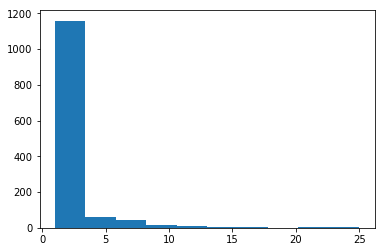

In [6]:
df = df.rename(columns={'area_y': 'house_number'}) #rename
household_house_number = df.drop_duplicates(['phone'])['house_number'] #each household or realtor house number 
plt.hist(household_house_number)
#household_house_number.describe() #summary household_house_number
show()

# And show the table

可發現多數人(84.87%)房子數多為兩間以下。

In [7]:
Counter(household_house_number) #show the table of household_house_number

Counter({1: 966,
         2: 139,
         3: 54,
         4: 28,
         5: 34,
         6: 19,
         7: 9,
         8: 14,
         9: 8,
         10: 5,
         11: 8,
         12: 3,
         13: 5,
         15: 2,
         16: 1,
         17: 1,
         19: 1,
         21: 2,
         24: 1,
         25: 2})

# Check the price of each house

發現一極端值，至該筆資料網頁查看，房租為88,888,888元/月，只有3坪，不合理，視為異常值

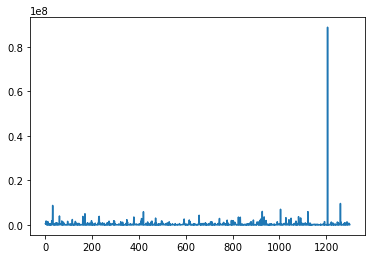

In [8]:
#df['price'].type
person_price = df.groupby('phone').agg({'price':'sum'}) #each person house price
person_price_list = list(person_price['price'])
plt.plot(person_price_list) #according to price, we can find abnormal data is data 1206, the price is too high
show()

# There are one abnormal value that we should erase it


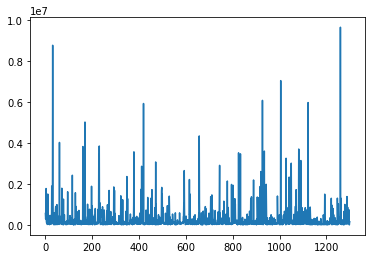

In [9]:
df = df.drop(df.index[np.where(df.iloc[:,[9]] == person_price.max())[0][0]]) #so erase it
person_price = df.groupby('phone').agg({'price':'sum'}) #each person house price
df = pd.merge(df,person_price,left_on='phone', right_index=True)
person_price_list = list(person_price['price'])
plt.plot(person_price_list) #each person get money/month
show()

# Histogram of rent income from 10,000 to 1,000,000 per month

可發現多數人(包含房東、房仲)每月房租值多為100,000以內。

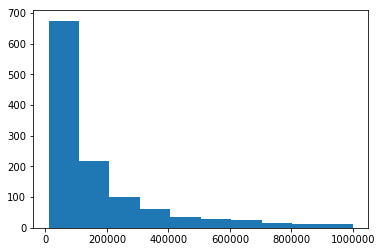

In [10]:
plt.hist(person_price_list,range=(10000, 1000000)) #display the passive income
show()

# Histogram of rent income (realtor)

觀察代理人、房仲之手上案件總價值，
若是手上案件多或是總價值高之房仲，其人脈及手腕較好，有機會可與其合作協助銀行業務(信用卡、保險等)


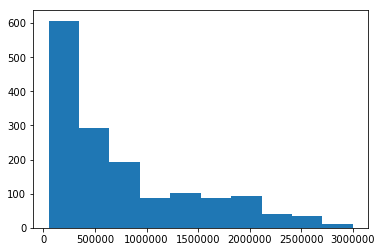

In [11]:
for_household = df.iloc[list(np.where(df.iloc[:,[4]]=="1") or np.where(df.iloc[:,[4]]=="0"))[0],:]
temp_1 = list(np.where(df.iloc[:,[4]]=="1"))[0] 
temp_2 = list(np.where(df.iloc[:,[4]]=="0"))[0]
for_household = np.append(temp_1,temp_2)
for_household = df.iloc[for_household,:]
plt.hist(for_household['price_y'],range=(50000, 3000000))
show()

下表為各代理人或房仲其手上案件之總金額。

房仲其手上案件總金額多為10萬以上(Q1即為16萬)，中位數為57萬，估計至少兩間店面，代表仲介店面之房仲皆可能有許多案件可供顧客選擇，未來國泰可與此類仲介合作，向房東、房客推薦保險，保障雙方權益。

In [12]:
for_household['price_y'].describe()

count    1.958000e+03
mean     1.306915e+06
std      1.844727e+06
min      7.500000e+03
25%      1.650000e+05
50%      5.739990e+05
75%      1.720000e+06
max      9.637795e+06
Name: price_y, dtype: float64

# Histogram of rent income (householder)

收入高之房東，其存款不一定於國泰銀行。

未來可將此類特徵加入至信用評等或是配人給分等機制，提供經濟能力較好之房東更多優惠，使其成為國泰銀行之客戶。

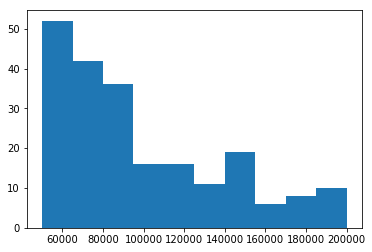

In [13]:
owner = df.iloc[list(np.where(df.iloc[:,[4]]=="2"))[0],:]
plt.hist(owner['price_y'],range=(50000, 200000))
show()

下表為各房東其房租每月租金總額。

中位數為50000，Q1為30000，可見具有店面之房東大多其被動收入即為一般人之薪水。

In [14]:
owner['price_y'].describe()

count    5.270000e+02
mean     9.471766e+04
std      1.376793e+05
min      1.000000e+03
25%      3.000000e+04
50%      5.000000e+04
75%      1.000000e+05
max      1.500000e+06
Name: price_y, dtype: float64

# 分群(2~10群)

可發現K=2為最佳

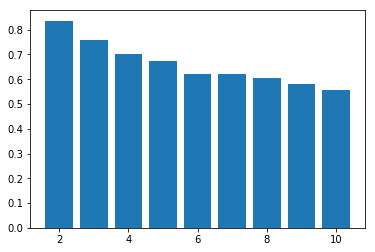

[0.83636682151352237, 0.7576066803118241, 0.70385215293705017, 0.67356344024473302, 0.62292945970319791, 0.62188747171219205, 0.60451360423593825, 0.58215884890296654, 0.55689901854630441]


In [15]:
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
x = df.iloc[:,[1,3,4,5,6,7,9,10]]
cluster_labels = {}
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(df.iloc[:,[1,3,4,5,6,7,9,10]])
    cluster_labels[k] = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(df.iloc[:,[1,3,4,5,6,7,9,10]], cluster_labels[k])
    silhouette_avgs.append(silhouette_avg)
#plot from 2 to 10 clustering
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)


# 分別觀察兩群差異

In [16]:
plt.style.use('ggplot')
temp_1 = df.iloc[list(np.where(cluster_labels[2]==0)[0]),:]
temp_2 = df.iloc[list(np.where(cluster_labels[2]==1)[0]),:]

In [17]:
decorate_temp_1 = pd.Series.mean(temp_1['decorate'].astype(int))
decorate_temp_1 = (decorate_temp_1-df['decorate'].astype(float).min())/(df['decorate'].astype(float).max()-df['decorate'].astype(float).min())
household_temp_1 = pd.Series.mean(temp_1['household'].astype(int))
household_temp_1 = (household_temp_1-df['household'].astype(float).min())/(df['household'].astype(float).max()-df['household'].astype(float).min())
lease_tern_temp_1 = pd.Series.mean(temp_1['lease_tern'].astype(int))
lease_tern_temp_1 = (lease_tern_temp_1-df['lease_tern'].astype(float).min())/(df['lease_tern'].astype(float).max()-df['lease_tern'].astype(float).min())
management_fee_temp_1 = pd.Series.mean(temp_1['management_fee'].astype(int))
management_fee_temp_1 = (management_fee_temp_1-df['management_fee'].astype(float).min())/(df['management_fee'].astype(float).max()-df['management_fee'].astype(float).min())
parking_space_temp_1 = pd.Series.mean(temp_1['parking_space'].astype(int))
parking_space_temp_1 = (parking_space_temp_1-df['parking_space'].astype(float).min())/(df['parking_space'].astype(float).max()-df['parking_space'].astype(float).min())
price_x_temp_1 = pd.Series.mean(temp_1['price_x'].astype(int))
price_x_temp_1 = (price_x_temp_1-df['price_x'].astype(float).min())/(df['price_x'].astype(float).max()-df['price_x'].astype(float).min())
space_temp_1 = pd.Series.mean(temp_1['space'].astype(float))
space_temp_1 = (space_temp_1-df['space'].astype(float).min())/(df['space'].astype(float).max()-df['space'].astype(float).min())

values_1 = [decorate_temp_1,household_temp_1,lease_tern_temp_1,management_fee_temp_1,parking_space_temp_1,price_x_temp_1,space_temp_1]
#values_1 = np.multiply(values_1,10)
feature = ['decorate', 'household', 'lease_tern','management_fee','parking_space', 'price_x', 'space']
print(feature)
print(values_1)

N = len(feature)
angles_1 = np.linspace(0, 2*np.pi, N, endpoint=False)# 設置雷達圖的角度，用於平分切開一個圓面
values_1 = np.concatenate((values_1,[values_1[0]]))# 為了使雷達圖一圈封閉起來，需要下面的步驟
angles_1 = np.concatenate((angles_1,[angles_1[0]]))


['decorate', 'household', 'lease_tern', 'management_fee', 'parking_space', 'price_x', 'space']
[0.34714003944773175, 0.56445477599323757, 0.082187043725505268, 0.0057838360036162233, 0.065722738799661881, 0.033550547407152874, 0.0089065860414655144]


# 利用雷達圖觀察第一群(正規化0~1)

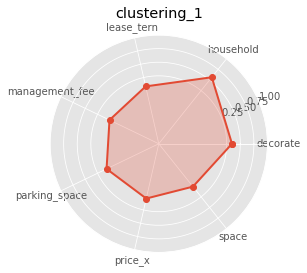

In [18]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles_1, values_1, 'o-', linewidth=2)
ax.fill(angles_1, values_1, alpha=0.25)
ax.set_thetagrids(angles_1 * 180/np.pi, feature)
ax.set_ylim(-1,1)
plt.title('clustering_1')
ax.grid(True)
plt.show()


In [19]:
decorate_temp_2 = pd.Series.mean(temp_2['decorate'].astype(int))
decorate_temp_2 = (decorate_temp_2-df['decorate'].astype(float).min())/(df['decorate'].astype(float).max()-df['decorate'].astype(float).min())
household_temp_2 = pd.Series.mean(temp_2['household'].astype(int))
household_temp_2 = (household_temp_2-df['household'].astype(float).min())/(df['household'].astype(float).max()-df['household'].astype(float).min())
lease_tern_temp_2 = pd.Series.mean(temp_2['lease_tern'].astype(int))
lease_tern_temp_2 = (lease_tern_temp_2-df['lease_tern'].astype(float).min())/(df['lease_tern'].astype(float).max()-df['lease_tern'].astype(float).min())
management_fee_temp_2 = pd.Series.mean(temp_2['management_fee'].astype(int))
management_fee_temp_2 = (management_fee_temp_2-df['management_fee'].astype(float).min())/(df['management_fee'].astype(float).max()-df['management_fee'].astype(float).min())
parking_space_temp_2 = pd.Series.mean(temp_2['parking_space'].astype(int))
parking_space_temp_2 = (parking_space_temp_2-df['parking_space'].astype(float).min())/(df['parking_space'].astype(float).max()-df['parking_space'].astype(float).min())
price_x_temp_2 = pd.Series.mean(temp_2['price_x'].astype(int))
price_x_temp_2 = (price_x_temp_2-df['price_x'].astype(float).min())/(df['price_x'].astype(float).max()-df['price_x'].astype(float).min())
space_temp_2 = pd.Series.mean(temp_2['space'].astype(float))
space_temp_2 = (space_temp_2-df['space'].astype(float).min())/(df['space'].astype(float).max()-df['space'].astype(float).min())

values_2 = [decorate_temp_2,household_temp_2,lease_tern_temp_2,management_fee_temp_2,parking_space_temp_2,price_x_temp_2,space_temp_2]
#values_2 = np.multiply(values_2,10)
feature = ['decorate', 'household', 'lease_tern','management_fee','parking_space', 'price_x', 'space']
print(feature)
print(values_2)
N = len(feature)
angles_2 = np.linspace(0, 2*np.pi, N, endpoint=False)
values_2 = np.concatenate((values_2,[values_2[0]]))
angles_2 = np.concatenate((angles_2,[angles_2[0]]))


['decorate', 'household', 'lease_tern', 'management_fee', 'parking_space', 'price_x', 'space']
[0.33053221288515405, 0.47899159663865548, 0.085561497326203204, 0.047691727769151995, 0.15546218487394958, 0.26136335256525506, 0.061337399056601516]


# 利用雷達圖觀察第二群(正規化0~1)

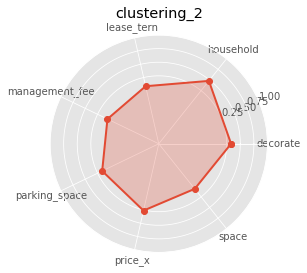

In [20]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles_2, values_2, 'o-', linewidth=2)
ax.fill(angles_2, values_2, alpha=0.25)
ax.set_thetagrids(angles_2 * 180/np.pi, feature)
ax.set_ylim(-1,1)
plt.title('clustering_2')
ax.grid(True)
plt.show()

# 兩群差異為下

第一群和第二群之"price_x"(租金)平均分別為(0.03355,0.26136)，為其7倍。


'space'(租屋大小坪數)平均分別為(0.0089,0.0613)，為其6倍

'parking_space'平均分別為(0.0657,0.1555)，為其2.5倍

'management_fee'平均分別為(0.0057,0.0477)，為其8倍

該分群結果明顯將第二群視為高檔店面，此類房東或是租客較有機會進行高資產管理，此類房東、房客多為開設店面營業用，通常可推薦商店綜合險、動產火險等，保障其營業安全。

# 未來應用

可定期爬蟲該網站，可建立一時間序列之資料庫除了蒐集房東、土地資訊協助信用評等、客戶評分外，可提建立推薦系統，供貸款買房爾或創業之民眾加值服務，針對客戶性質推薦不同之店面、租屋資訊。

亦可進行房價預測，B2B之合作(例如永慶房屋)，偕同投資等。

建立時間序列之資料，亦可觀察房市交易量及租金，
交易量越大表示該租金越貼近該價值，又因租金反映房價，可利用該資訊觀察各區之交易，進而發展為投資系統。